In [1]:
! pip install seaborn
! pip install pandas

You should consider upgrading via the 'C:\Users\User\opencv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\User\opencv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [4]:
os.getcwd()

'C:\\Users\\User\\opencv\\Scripts'

In [4]:
data=pd.read_csv("./PROJECT_IPL_1_Edited.csv")

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Player Name                                            60 non-null     object
 1   Base Price (in Lakhs Rupees)                           60 non-null     int64 
 2   Price Paid (in Lakhs Rupees)                           60 non-null     int64 
 3   Status                                                 60 non-null     object
 4   Bought by                                              60 non-null     object
 5   Previous IPL Teams                                     37 non-null     object
 6   Country                                                60 non-null     object
 7   Role                                                   60 non-null     object
 8   Batting Style                                          39 non-

In [11]:
### Pie Chart

In [7]:
data.rename(columns={'Player Name':'Player_Name','Base Price (in Lakhs Rupees)':'Base_Price','Price Paid (in Lakhs Rupees)':'Price_Paid','Status':'Status','Bought by':'Bought_by','Previous IPL Teams':'Previous_IPL_Teams','Country':'Country','Role':'Role','Batting Style':'Batting_Style','Bowling Style':'Bowling_Style','Batting Order':'Batting_Order','Capped or Uncapped at Internationals (during Auction)':'Capped_or_Uncapped'},inplace='True')

In [67]:
data.loc[data["Role"] == "Fast Bowler", "Role"] = "Seam Bowler"

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Player_Name         60 non-null     object
 1   Base_Price          60 non-null     int64 
 2   Price_Paid          60 non-null     int64 
 3   Status              60 non-null     object
 4   Bought_by           60 non-null     object
 5   Previous_IPL_Teams  37 non-null     object
 6   Country             60 non-null     object
 7   Role                60 non-null     object
 8   Batting_Style       39 non-null     object
 9   Bowling_Style       46 non-null     object
 10  Batting_Order       39 non-null     object
 11  Capped_or_Uncapped  60 non-null     object
dtypes: int64(2), object(10)
memory usage: 5.8+ KB


Text(0.5, 1.0, 'Amount Spent by each team')

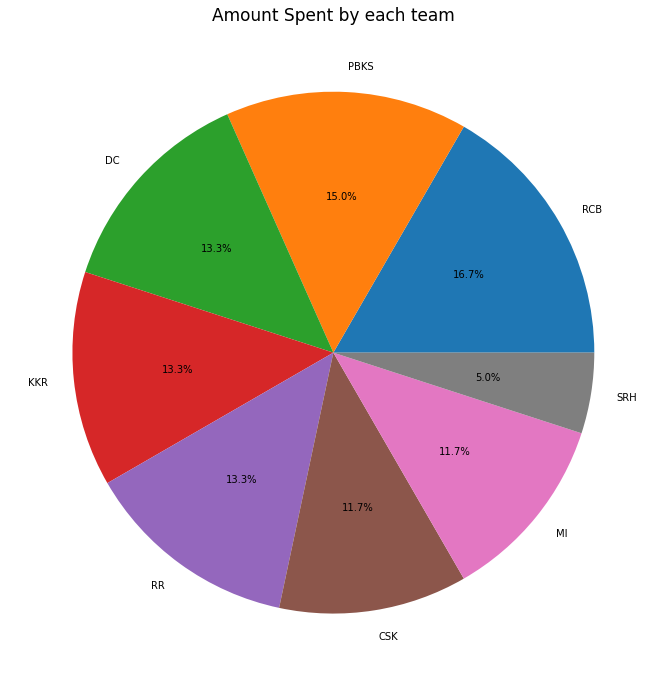

In [8]:
temp=pd.DataFrame({"Amount Spent": data['Bought_by']})
count=temp.value_counts()
labels=[X[0] for X in count.keys()]
bar , ax =plt.subplots(figsize=(20,12))
ax=plt.pie(x=count, autopct="%.1f%%",labels= labels)
plt.title("Amount Spent by each team", fontsize=17)


In [68]:
###Team Wise Analysis

In [69]:
csk=data.groupby('Bought_by').get_group('CSK')
csk

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
4,Bhagath Varma,20,20,Sold,CSK,NaN,India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped
5,C Hari Nishanth,20,20,Sold,CSK,NaN,India,Batsman,Left,NaN,Top,Uncapped
7,Cheteshwar Pujara,50,50,Sold,CSK,"RCB, KKR, PBKS",India,Batsman,Right,NaN,Top,Capped
14,Harishankar Reddy,20,20,Sold,CSK,NaN,India,Seam Bowler,NaN,Right Medium,NaN,Uncapped
22,Krishnappa Gowtham,20,925,Sold,CSK,"MI, RR, PBKS",India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped
29,Moeen Ali,200,700,Sold,CSK,RCB,England,Batting All Rounder,Left,Right Offbreak,Top,Capped
59,Robin Uthappa,0,300,Transfer,CSK,"MI, RCB, PWI, KKR, RR",India,Batsman,Right,NaN,Top,Capped


In [70]:
#Total Amount Spent

(csk['Price_Paid'].sum())/100

20.35

In [71]:
#List of CSK Batsmen

csk_bats=csk[csk['Role'].str.contains('Batsman')]
csk_bats

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
5,C Hari Nishanth,20,20,Sold,CSK,NaN,India,Batsman,Left,NaN,Top,Uncapped
7,Cheteshwar Pujara,50,50,Sold,CSK,"RCB, KKR, PBKS",India,Batsman,Right,NaN,Top,Capped
59,Robin Uthappa,0,300,Transfer,CSK,"MI, RCB, PWI, KKR, RR",India,Batsman,Right,NaN,Top,Capped


In [72]:
#List of CSK Bowlers

csk_bowl=csk[csk['Role'].str.contains('Bowler')]
csk_bowl

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
14,Harishankar Reddy,20,20,Sold,CSK,NaN,India,Seam Bowler,NaN,Right Medium,NaN,Uncapped


In [73]:
#List of CSK Allrounders

csk_all=csk[csk['Role'].str.contains('All Rounder')]
csk_all

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
4,Bhagath Varma,20,20,Sold,CSK,NaN,India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped
22,Krishnappa Gowtham,20,925,Sold,CSK,"MI, RR, PBKS",India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped
29,Moeen Ali,200,700,Sold,CSK,RCB,England,Batting All Rounder,Left,Right Offbreak,Top,Capped


In [74]:
#Highest Bid Details

csk[csk['Price_Paid']==csk['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
22,Krishnappa Gowtham,20,925,Sold,CSK,"MI, RR, PBKS",India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped


In [75]:
#Highest Indian Bid Details

csk[csk['Price_Paid']==csk[csk['Country']=='India']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
22,Krishnappa Gowtham,20,925,Sold,CSK,"MI, RR, PBKS",India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped


In [76]:
#Highest Foreign Bid Details

csk[csk['Price_Paid']==csk[csk['Country']!='India']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
29,Moeen Ali,200,700,Sold,CSK,RCB,England,Batting All Rounder,Left,Right Offbreak,Top,Capped


In [77]:
#Amount spent on each department

csk_price=csk.groupby('Role')['Price_Paid'].sum()/100
csk_price

Role
Batsman                3.70
Batting All Rounder    7.00
Bowling All Rounder    9.45
Seam Bowler            0.20
Name: Price_Paid, dtype: float64

In [78]:
#CSK Batsman with Highest Bid

csk_bats[csk_bats['Price_Paid']==csk_bats['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
59,Robin Uthappa,0,300,Transfer,CSK,"MI, RCB, PWI, KKR, RR",India,Batsman,Right,NaN,Top,Capped


In [79]:
#CSK Bowlers with Highest Bid

csk_bowl[csk_bowl['Price_Paid']==csk_bowl['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
14,Harishankar Reddy,20,20,Sold,CSK,NaN,India,Seam Bowler,NaN,Right Medium,NaN,Uncapped


In [80]:
#CSK All Rounders with Highest Bid

csk_all[csk_all['Price_Paid']==csk_all['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
22,Krishnappa Gowtham,20,925,Sold,CSK,"MI, RR, PBKS",India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped


In [81]:
#Average amount spent on each department

csk.groupby('Role')['Price_Paid'].mean()/100

Role
Batsman                1.233333
Batting All Rounder    7.000000
Bowling All Rounder    4.725000
Seam Bowler            0.200000
Name: Price_Paid, dtype: float64

In [82]:
#Highest Capped Bid

csk[csk['Price_Paid']==csk[csk['Capped_or_Uncapped']=='Capped']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
29,Moeen Ali,200,700,Sold,CSK,RCB,England,Batting All Rounder,Left,Right Offbreak,Top,Capped


In [83]:
#Highest Uncapped Bid

csk[csk['Price_Paid']==csk[csk['Capped_or_Uncapped']=='Uncapped']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
22,Krishnappa Gowtham,20,925,Sold,CSK,"MI, RR, PBKS",India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped


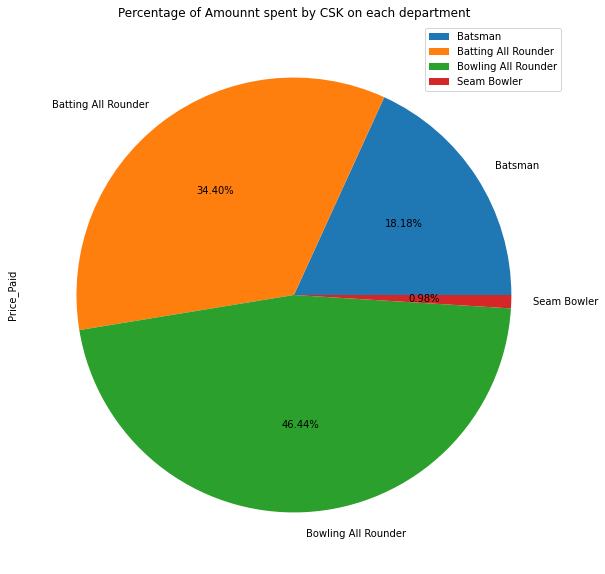

In [84]:
#Amount Distribution - Pie Chart Visualization

csk.groupby(['Role']).sum().plot(kind='pie', y='Price_Paid', autopct="%.2f%%", figsize=(20,10), title="Percentage of Amounnt spent by CSK on each department").legend(loc='upper right')

In [85]:
#List of IPL Experienced Players

bool_s=pd.notnull(csk['Previous_IPL_Teams'])
csk[bool_s]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
7,Cheteshwar Pujara,50,50,Sold,CSK,"RCB, KKR, PBKS",India,Batsman,Right,NaN,Top,Capped
22,Krishnappa Gowtham,20,925,Sold,CSK,"MI, RR, PBKS",India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped
29,Moeen Ali,200,700,Sold,CSK,RCB,England,Batting All Rounder,Left,Right Offbreak,Top,Capped
59,Robin Uthappa,0,300,Transfer,CSK,"MI, RCB, PWI, KKR, RR",India,Batsman,Right,NaN,Top,Capped


In [86]:
#List of IPL Newbies in CSK

bool_s=pd.isnull(csk['Previous_IPL_Teams'])
csk[bool_s]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
4,Bhagath Varma,20,20,Sold,CSK,NaN,India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped
5,C Hari Nishanth,20,20,Sold,CSK,NaN,India,Batsman,Left,NaN,Top,Uncapped
14,Harishankar Reddy,20,20,Sold,CSK,NaN,India,Seam Bowler,NaN,Right Medium,NaN,Uncapped


In [87]:
#List of Internationally Experienced Players in CSK

csk[csk['Capped_or_Uncapped']=='Capped']

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
7,Cheteshwar Pujara,50,50,Sold,CSK,"RCB, KKR, PBKS",India,Batsman,Right,NaN,Top,Capped
29,Moeen Ali,200,700,Sold,CSK,RCB,England,Batting All Rounder,Left,Right Offbreak,Top,Capped
59,Robin Uthappa,0,300,Transfer,CSK,"MI, RCB, PWI, KKR, RR",India,Batsman,Right,NaN,Top,Capped


In [88]:
#List of Internationally Inexperienced Players in CSK

csk[csk['Capped_or_Uncapped']=='Uncapped']

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
4,Bhagath Varma,20,20,Sold,CSK,NaN,India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped
5,C Hari Nishanth,20,20,Sold,CSK,NaN,India,Batsman,Left,NaN,Top,Uncapped
14,Harishankar Reddy,20,20,Sold,CSK,NaN,India,Seam Bowler,NaN,Right Medium,NaN,Uncapped
22,Krishnappa Gowtham,20,925,Sold,CSK,"MI, RR, PBKS",India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped


In [246]:
#No. of players bought at base price

len(csk[csk['Price_Paid']==csk['Base_Price']])

4

In [247]:
#No. of players bought more than base price

len(csk[csk['Price_Paid']!=csk['Base_Price']])

3

In [89]:
rcb=data.groupby('Bought_by').get_group('RCB')

In [90]:
rcb

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
9,Dan Christian,75,480,Sold,RCB,"RCB, RPS, DC, SRH",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
12,Glenn Maxwell,200,1425,Sold,RCB,"PBKS, MI, DC",Australia,Batting All Rounder,Right,Right Offbreak,Middle,Capped
24,Kyle Jamieson,75,1500,Sold,RCB,NaN,New Zealand,Seam Bowler,NaN,Right Fast Medium,NaN,Capped
30,Mohammed Azharuddeen,20,20,Sold,RCB,NaN,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
37,Rajat Patidar,20,20,Sold,RCB,NaN,India,Batsman,Right,NaN,Top,Uncapped
40,Sachin Baby,20,20,Sold,RCB,"RR, RCB, SRH",India,Batsman,Left,NaN,Middle,Uncapped
47,Srikar Bharat,20,20,Sold,RCB,DC,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
49,Suyash Prabhudessai,20,20,Sold,RCB,NaN,India,Batting All Rounder,Right,Right Medium,Middle,Uncapped
57,Daniel Sams,0,30,Transfer,RCB,DC,Australia,All Rounder,Right,Left Fast Medium,Middle,Capped
58,Harshal Patel,0,20,Transfer,RCB,"DC, RCB",India,Seam Bowler,NaN,Right Medium,NaN,Uncapped


In [91]:
#Total Amount Spent

(rcb['Price_Paid'].sum())/100

35.55

In [92]:
#List of RCB Batsmen

rcb_bats=rcb[rcb['Role'].str.contains('Batsman')]
rcb_bats

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
30,Mohammed Azharuddeen,20,20,Sold,RCB,NaN,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
37,Rajat Patidar,20,20,Sold,RCB,NaN,India,Batsman,Right,NaN,Top,Uncapped
40,Sachin Baby,20,20,Sold,RCB,"RR, RCB, SRH",India,Batsman,Left,NaN,Middle,Uncapped
47,Srikar Bharat,20,20,Sold,RCB,DC,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped


In [93]:
#List of RCB Bowlers

rcb_bowl=rcb[rcb['Role'].str.contains('Bowler')]
rcb_bowl

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
24,Kyle Jamieson,75,1500,Sold,RCB,NaN,New Zealand,Seam Bowler,NaN,Right Fast Medium,NaN,Capped
58,Harshal Patel,0,20,Transfer,RCB,"DC, RCB",India,Seam Bowler,NaN,Right Medium,NaN,Uncapped


In [94]:
#List of RCB All Rounders

rcb_all=rcb[rcb['Role'].str.contains('All Rounder')]
rcb_all

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
9,Dan Christian,75,480,Sold,RCB,"RCB, RPS, DC, SRH",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
12,Glenn Maxwell,200,1425,Sold,RCB,"PBKS, MI, DC",Australia,Batting All Rounder,Right,Right Offbreak,Middle,Capped
49,Suyash Prabhudessai,20,20,Sold,RCB,NaN,India,Batting All Rounder,Right,Right Medium,Middle,Uncapped
57,Daniel Sams,0,30,Transfer,RCB,DC,Australia,All Rounder,Right,Left Fast Medium,Middle,Capped


In [95]:
#Highest Bid Details

rcb[rcb['Price_Paid']==rcb['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
24,Kyle Jamieson,75,1500,Sold,RCB,NaN,New Zealand,Seam Bowler,NaN,Right Fast Medium,NaN,Capped


In [96]:
#Highest Indian Bid Details

rcb[rcb['Price_Paid']==rcb[rcb['Country']=='India']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
30,Mohammed Azharuddeen,20,20,Sold,RCB,NaN,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
37,Rajat Patidar,20,20,Sold,RCB,NaN,India,Batsman,Right,NaN,Top,Uncapped
40,Sachin Baby,20,20,Sold,RCB,"RR, RCB, SRH",India,Batsman,Left,NaN,Middle,Uncapped
47,Srikar Bharat,20,20,Sold,RCB,DC,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
49,Suyash Prabhudessai,20,20,Sold,RCB,NaN,India,Batting All Rounder,Right,Right Medium,Middle,Uncapped
58,Harshal Patel,0,20,Transfer,RCB,"DC, RCB",India,Seam Bowler,NaN,Right Medium,NaN,Uncapped


In [97]:
#Highest Foreign Bid Details

rcb[rcb['Price_Paid']==rcb[rcb['Country']!='India']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
24,Kyle Jamieson,75,1500,Sold,RCB,NaN,New Zealand,Seam Bowler,NaN,Right Fast Medium,NaN,Capped


In [98]:
#Amount spent on each department

rcb_price=rcb.groupby('Role')['Price_Paid'].sum()/100
rcb_price

Role
All Rounder               5.10
Batsman                   0.40
Batting All Rounder      14.45
Seam Bowler              15.20
Wicket Keeper Batsman     0.40
Name: Price_Paid, dtype: float64

In [99]:
#RCB Batsman with Highest Bid

rcb_bats[rcb_bats['Price_Paid']==rcb_bats['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
30,Mohammed Azharuddeen,20,20,Sold,RCB,NaN,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
37,Rajat Patidar,20,20,Sold,RCB,NaN,India,Batsman,Right,NaN,Top,Uncapped
40,Sachin Baby,20,20,Sold,RCB,"RR, RCB, SRH",India,Batsman,Left,NaN,Middle,Uncapped
47,Srikar Bharat,20,20,Sold,RCB,DC,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped


In [100]:
#RCB Bowlers with Highest Bid

rcb_bowl[rcb_bowl['Price_Paid']==rcb_bowl['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
24,Kyle Jamieson,75,1500,Sold,RCB,NaN,New Zealand,Seam Bowler,NaN,Right Fast Medium,NaN,Capped


In [101]:
#RCB All Rounders with Highest Bid

rcb_all[rcb_all['Price_Paid']==rcb_all['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
12,Glenn Maxwell,200,1425,Sold,RCB,"PBKS, MI, DC",Australia,Batting All Rounder,Right,Right Offbreak,Middle,Capped


In [102]:
#Average amount spent on each department

rcb.groupby('Role')['Price_Paid'].mean()/100

Role
All Rounder              2.550
Batsman                  0.200
Batting All Rounder      7.225
Seam Bowler              7.600
Wicket Keeper Batsman    0.200
Name: Price_Paid, dtype: float64

In [103]:
#Highest Capped Bid

rcb[rcb['Price_Paid']==rcb[rcb['Capped_or_Uncapped']=='Capped']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
24,Kyle Jamieson,75,1500,Sold,RCB,NaN,New Zealand,Seam Bowler,NaN,Right Fast Medium,NaN,Capped


In [104]:
#Highest Uncapped Bid

rcb[rcb['Price_Paid']==rcb[rcb['Capped_or_Uncapped']=='Uncapped']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
30,Mohammed Azharuddeen,20,20,Sold,RCB,NaN,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
37,Rajat Patidar,20,20,Sold,RCB,NaN,India,Batsman,Right,NaN,Top,Uncapped
40,Sachin Baby,20,20,Sold,RCB,"RR, RCB, SRH",India,Batsman,Left,NaN,Middle,Uncapped
47,Srikar Bharat,20,20,Sold,RCB,DC,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
49,Suyash Prabhudessai,20,20,Sold,RCB,NaN,India,Batting All Rounder,Right,Right Medium,Middle,Uncapped
58,Harshal Patel,0,20,Transfer,RCB,"DC, RCB",India,Seam Bowler,NaN,Right Medium,NaN,Uncapped


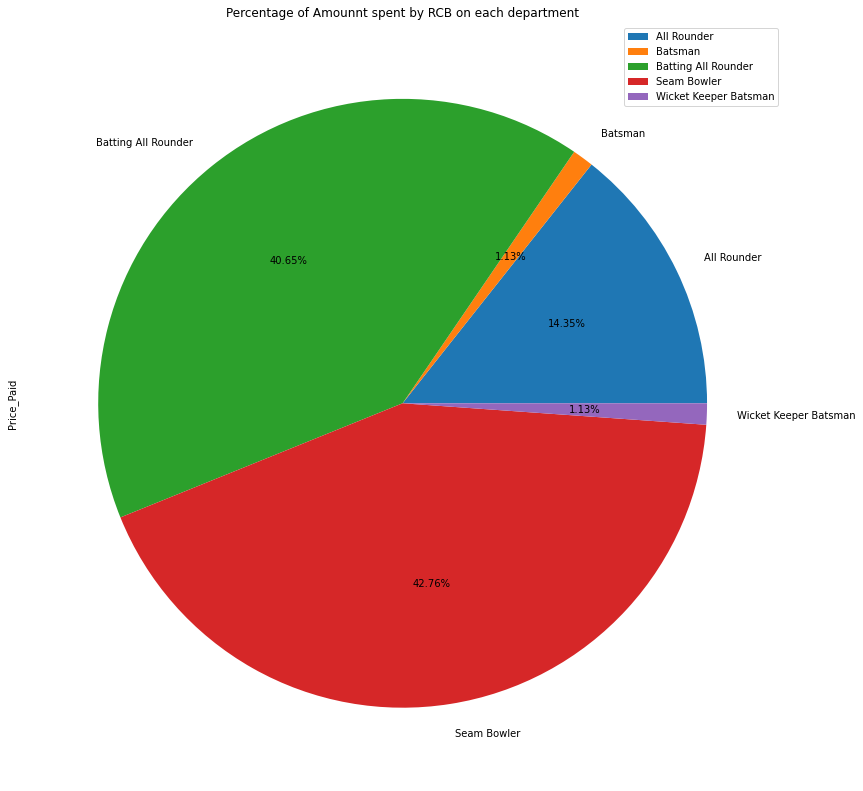

In [105]:
#Amount Distribution - Pie Chart Visualization

rcb.groupby(['Role']).sum().plot(kind='pie', y='Price_Paid', autopct="%.2f%%", figsize=(15,14), title="Percentage of Amounnt spent by RCB on each department").legend(loc='upper right')

In [106]:
#List of IPL Experienced Players in RCB

bool_s=pd.notnull(rcb['Previous_IPL_Teams'])
rcb[bool_s]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
9,Dan Christian,75,480,Sold,RCB,"RCB, RPS, DC, SRH",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
12,Glenn Maxwell,200,1425,Sold,RCB,"PBKS, MI, DC",Australia,Batting All Rounder,Right,Right Offbreak,Middle,Capped
40,Sachin Baby,20,20,Sold,RCB,"RR, RCB, SRH",India,Batsman,Left,NaN,Middle,Uncapped
47,Srikar Bharat,20,20,Sold,RCB,DC,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
57,Daniel Sams,0,30,Transfer,RCB,DC,Australia,All Rounder,Right,Left Fast Medium,Middle,Capped
58,Harshal Patel,0,20,Transfer,RCB,"DC, RCB",India,Seam Bowler,NaN,Right Medium,NaN,Uncapped


In [107]:
#List of IPL Newbies in RCB

bool_s=pd.isnull(rcb['Previous_IPL_Teams'])
rcb[bool_s]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
24,Kyle Jamieson,75,1500,Sold,RCB,NaN,New Zealand,Seam Bowler,NaN,Right Fast Medium,NaN,Capped
30,Mohammed Azharuddeen,20,20,Sold,RCB,NaN,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
37,Rajat Patidar,20,20,Sold,RCB,NaN,India,Batsman,Right,NaN,Top,Uncapped
49,Suyash Prabhudessai,20,20,Sold,RCB,NaN,India,Batting All Rounder,Right,Right Medium,Middle,Uncapped


In [108]:
#List of Internationally Experienced Players in RCB

rcb[rcb['Capped_or_Uncapped']=='Capped']

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
9,Dan Christian,75,480,Sold,RCB,"RCB, RPS, DC, SRH",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
12,Glenn Maxwell,200,1425,Sold,RCB,"PBKS, MI, DC",Australia,Batting All Rounder,Right,Right Offbreak,Middle,Capped
24,Kyle Jamieson,75,1500,Sold,RCB,NaN,New Zealand,Seam Bowler,NaN,Right Fast Medium,NaN,Capped
57,Daniel Sams,0,30,Transfer,RCB,DC,Australia,All Rounder,Right,Left Fast Medium,Middle,Capped


In [109]:
#List of Internationally Inexperienced Players in RCB

rcb[rcb['Capped_or_Uncapped']=='Uncapped']

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
30,Mohammed Azharuddeen,20,20,Sold,RCB,NaN,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
37,Rajat Patidar,20,20,Sold,RCB,NaN,India,Batsman,Right,NaN,Top,Uncapped
40,Sachin Baby,20,20,Sold,RCB,"RR, RCB, SRH",India,Batsman,Left,NaN,Middle,Uncapped
47,Srikar Bharat,20,20,Sold,RCB,DC,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
49,Suyash Prabhudessai,20,20,Sold,RCB,NaN,India,Batting All Rounder,Right,Right Medium,Middle,Uncapped
58,Harshal Patel,0,20,Transfer,RCB,"DC, RCB",India,Seam Bowler,NaN,Right Medium,NaN,Uncapped


In [244]:
#No. of players bought at base price

len(rcb[rcb['Price_Paid']==rcb['Base_Price']])

5

In [245]:
#No. of players bought more than base price

len(rcb[rcb['Price_Paid']!=rcb['Base_Price']])

5

In [110]:
mi=data.groupby('Bought_by').get_group('MI')
mi

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
0,Adam Milne,50,320,Sold,MI,RCB,New Zealand,Seam Bowler,NaN,Right Fast,NaN,Capped
2,Arjun Tendulkar,20,20,Sold,MI,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
17,James Neesham,50,50,Sold,MI,"DC, PBKS, KKR",New Zealand,Batting All Rounder,Left,Right Medium,Middle,Capped
28,Marco Jansen,20,20,Sold,MI,NaN,South Africa,Bowling All Rounder,Right,Left Fast,Lower,Uncapped
34,Nathan Coulter-Nile,150,500,Sold,MI,"MI, DC, KKR, RCB",Australia,Bowling All Rounder,Right,Right Fast,Lower,Capped
36,Piyush Chawla,50,240,Sold,MI,"KKR, PBKS, CSK",India,Bowling All Rounder,Left,Right Legbreak,Lower,Capped
56,Yudhvir Charak,20,20,Sold,MI,NaN,India,Seam Bowler,NaN,Right Medium Fast,NaN,Uncapped


In [111]:
#Total Amount Spent

(mi['Price_Paid'].sum())/100

11.7

In [112]:
#List of MI Batsmen

mi_bats=mi[mi['Role'].str.contains('Batsman')]
mi_bats

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped


In [113]:
#List of MI Bowlers

mi_bowl=mi[mi['Role'].str.contains('Bowler')]
mi_bowl

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
0,Adam Milne,50,320,Sold,MI,RCB,New Zealand,Seam Bowler,NaN,Right Fast,NaN,Capped
2,Arjun Tendulkar,20,20,Sold,MI,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
56,Yudhvir Charak,20,20,Sold,MI,NaN,India,Seam Bowler,NaN,Right Medium Fast,NaN,Uncapped


In [114]:
#List of MI Allrounders

mi_all=mi[mi['Role'].str.contains('All Rounder')]
mi_all

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
17,James Neesham,50,50,Sold,MI,"DC, PBKS, KKR",New Zealand,Batting All Rounder,Left,Right Medium,Middle,Capped
28,Marco Jansen,20,20,Sold,MI,NaN,South Africa,Bowling All Rounder,Right,Left Fast,Lower,Uncapped
34,Nathan Coulter-Nile,150,500,Sold,MI,"MI, DC, KKR, RCB",Australia,Bowling All Rounder,Right,Right Fast,Lower,Capped
36,Piyush Chawla,50,240,Sold,MI,"KKR, PBKS, CSK",India,Bowling All Rounder,Left,Right Legbreak,Lower,Capped


In [115]:
#Highest Bid Details

mi[mi['Price_Paid']==mi['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
34,Nathan Coulter-Nile,150,500,Sold,MI,"MI, DC, KKR, RCB",Australia,Bowling All Rounder,Right,Right Fast,Lower,Capped


In [116]:
#Highest Indian Bid Details

mi[mi['Price_Paid']==mi[mi['Country']=='India']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
36,Piyush Chawla,50,240,Sold,MI,"KKR, PBKS, CSK",India,Bowling All Rounder,Left,Right Legbreak,Lower,Capped


In [117]:
#Highest Foreign Bid Details

mi[mi['Price_Paid']==mi[mi['Country']!='India']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
34,Nathan Coulter-Nile,150,500,Sold,MI,"MI, DC, KKR, RCB",Australia,Bowling All Rounder,Right,Right Fast,Lower,Capped


In [118]:
#Amount spent on each department

mi_price=mi.groupby('Role')['Price_Paid'].sum()/100
mi_price

Role
Batting All Rounder    0.5
Bowling All Rounder    7.6
Seam Bowler            3.6
Name: Price_Paid, dtype: float64

In [119]:
#MI Batsman with Highest Bid

mi_bats[mi_bats['Price_Paid']==mi_bats['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped


In [120]:
#MI Bowlers with Highest Bid

mi_bowl[mi_bowl['Price_Paid']==mi_bowl['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
0,Adam Milne,50,320,Sold,MI,RCB,New Zealand,Seam Bowler,NaN,Right Fast,NaN,Capped


In [121]:
#MI All Rounders with Highest Bid

mi_all[mi_all['Price_Paid']==mi_all['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
34,Nathan Coulter-Nile,150,500,Sold,MI,"MI, DC, KKR, RCB",Australia,Bowling All Rounder,Right,Right Fast,Lower,Capped


In [122]:
#Average amount spent on each department

mi.groupby('Role')['Price_Paid'].mean()/100

Role
Batting All Rounder    0.500000
Bowling All Rounder    2.533333
Seam Bowler            1.200000
Name: Price_Paid, dtype: float64

In [123]:
#Highest Capped Bid

mi[mi['Price_Paid']==mi[mi['Capped_or_Uncapped']=='Capped']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
34,Nathan Coulter-Nile,150,500,Sold,MI,"MI, DC, KKR, RCB",Australia,Bowling All Rounder,Right,Right Fast,Lower,Capped


In [124]:
#Highest Uncapped Bid

mi[mi['Price_Paid']==mi[mi['Capped_or_Uncapped']=='Uncapped']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
2,Arjun Tendulkar,20,20,Sold,MI,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
28,Marco Jansen,20,20,Sold,MI,NaN,South Africa,Bowling All Rounder,Right,Left Fast,Lower,Uncapped
56,Yudhvir Charak,20,20,Sold,MI,NaN,India,Seam Bowler,NaN,Right Medium Fast,NaN,Uncapped


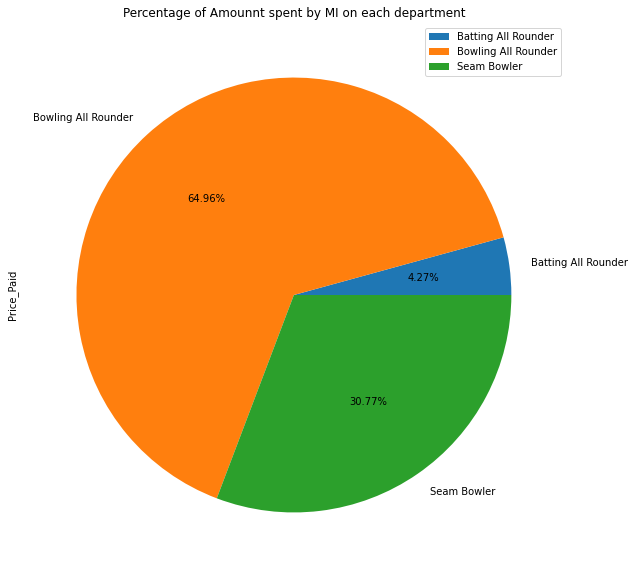

In [125]:
#Amount Distribution - Pie Chart Visualization

mi.groupby(['Role']).sum().plot(kind='pie', y='Price_Paid', autopct="%.2f%%", figsize=(20,10), title="Percentage of Amounnt spent by MI on each department").legend(loc='upper right')

In [126]:
#List of IPL Experienced Players in MI

bool_s=pd.notnull(mi['Previous_IPL_Teams'])
mi[bool_s]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
0,Adam Milne,50,320,Sold,MI,RCB,New Zealand,Seam Bowler,NaN,Right Fast,NaN,Capped
17,James Neesham,50,50,Sold,MI,"DC, PBKS, KKR",New Zealand,Batting All Rounder,Left,Right Medium,Middle,Capped
34,Nathan Coulter-Nile,150,500,Sold,MI,"MI, DC, KKR, RCB",Australia,Bowling All Rounder,Right,Right Fast,Lower,Capped
36,Piyush Chawla,50,240,Sold,MI,"KKR, PBKS, CSK",India,Bowling All Rounder,Left,Right Legbreak,Lower,Capped


In [127]:
#List of IPL Newbies in MI

bool_s=pd.isnull(mi['Previous_IPL_Teams'])
mi[bool_s]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
2,Arjun Tendulkar,20,20,Sold,MI,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
28,Marco Jansen,20,20,Sold,MI,NaN,South Africa,Bowling All Rounder,Right,Left Fast,Lower,Uncapped
56,Yudhvir Charak,20,20,Sold,MI,NaN,India,Seam Bowler,NaN,Right Medium Fast,NaN,Uncapped


In [128]:
#List of Internationally Experienced Players in MI

mi[mi['Capped_or_Uncapped']=='Capped']

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
0,Adam Milne,50,320,Sold,MI,RCB,New Zealand,Seam Bowler,NaN,Right Fast,NaN,Capped
17,James Neesham,50,50,Sold,MI,"DC, PBKS, KKR",New Zealand,Batting All Rounder,Left,Right Medium,Middle,Capped
34,Nathan Coulter-Nile,150,500,Sold,MI,"MI, DC, KKR, RCB",Australia,Bowling All Rounder,Right,Right Fast,Lower,Capped
36,Piyush Chawla,50,240,Sold,MI,"KKR, PBKS, CSK",India,Bowling All Rounder,Left,Right Legbreak,Lower,Capped


In [129]:
#List of Internationally Inexperienced Players in MI

mi[mi['Capped_or_Uncapped']=='Uncapped']

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
2,Arjun Tendulkar,20,20,Sold,MI,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
28,Marco Jansen,20,20,Sold,MI,NaN,South Africa,Bowling All Rounder,Right,Left Fast,Lower,Uncapped
56,Yudhvir Charak,20,20,Sold,MI,NaN,India,Seam Bowler,NaN,Right Medium Fast,NaN,Uncapped


In [242]:
#No. of players bought at base price

len(mi[mi['Price_Paid']==mi['Base_Price']])

4

In [243]:
#No. of players bought more than base price

len(mi[mi['Price_Paid']!=mi['Base_Price']])

3

In [130]:
dc=data.groupby('Bought_by').get_group('DC')
dc

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
26,Lukman Meriwala,20,20,Sold,DC,NaN,India,Seam Bowler,NaN,Left Fast Medium,NaN,Uncapped
27,Manimaran Siddharth,20,20,Sold,DC,NaN,India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Uncapped
39,Ripal Patel,20,20,Sold,DC,NaN,India,Batting All Rounder,Right,Right Medium Fast,Middle,Uncapped
41,Sam Billings,200,200,Sold,DC,"DC, CSK",England,Wicket Keeper Batsman,Right,NaN,Middle,Capped
48,Steven Smith,200,200,Sold,DC,"RCB, KTK, PWI, RR, RPS",Australia,Batsman,Right,NaN,Middle,Capped
50,Tom Curran,150,525,Sold,DC,"KKR, RR",England,Bowling All Rounder,Right,Right Fast Medium,Lower,Capped
51,Umesh Yadav,100,100,Sold,DC,"RCB, KKR, DC",India,Seam Bowler,NaN,Right Fast,NaN,Capped
55,Vishnu Vinod,20,20,Sold,DC,RCB,India,Wicket Keeper Batsman,Right,NaN,Middle,Uncapped


In [131]:
#Total Amount Spent

(dc['Price_Paid'].sum())/100

11.05

In [132]:
#List of DC Batsmen

dc_bats=dc[dc['Role'].str.contains('Batsman')]
dc_bats

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
41,Sam Billings,200,200,Sold,DC,"DC, CSK",England,Wicket Keeper Batsman,Right,NaN,Middle,Capped
48,Steven Smith,200,200,Sold,DC,"RCB, KTK, PWI, RR, RPS",Australia,Batsman,Right,NaN,Middle,Capped
55,Vishnu Vinod,20,20,Sold,DC,RCB,India,Wicket Keeper Batsman,Right,NaN,Middle,Uncapped


In [133]:
#List of DC Bowlers

dc_bowl=dc[dc['Role'].str.contains('Bowler')]
dc_bowl

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
26,Lukman Meriwala,20,20,Sold,DC,NaN,India,Seam Bowler,NaN,Left Fast Medium,NaN,Uncapped
27,Manimaran Siddharth,20,20,Sold,DC,NaN,India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Uncapped
51,Umesh Yadav,100,100,Sold,DC,"RCB, KKR, DC",India,Seam Bowler,NaN,Right Fast,NaN,Capped


In [134]:
#List of DC Allrounders

dc_all=dc[dc['Role'].str.contains('All Rounder')]
dc_all

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
39,Ripal Patel,20,20,Sold,DC,NaN,India,Batting All Rounder,Right,Right Medium Fast,Middle,Uncapped
50,Tom Curran,150,525,Sold,DC,"KKR, RR",England,Bowling All Rounder,Right,Right Fast Medium,Lower,Capped


In [135]:
#Highest Bid Details

dc[dc['Price_Paid']==dc['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
50,Tom Curran,150,525,Sold,DC,"KKR, RR",England,Bowling All Rounder,Right,Right Fast Medium,Lower,Capped


In [136]:
#Highest Indian Bid Details

dc[dc['Price_Paid']==dc[dc['Country']=='India']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
51,Umesh Yadav,100,100,Sold,DC,"RCB, KKR, DC",India,Seam Bowler,NaN,Right Fast,NaN,Capped


In [137]:
#Highest Foreign Bid Details

dc[dc['Price_Paid']==dc[dc['Country']!='India']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
50,Tom Curran,150,525,Sold,DC,"KKR, RR",England,Bowling All Rounder,Right,Right Fast Medium,Lower,Capped


In [138]:
#Amount spent on each department

dc_price=dc.groupby('Role')['Price_Paid'].sum()/100
dc_price

Role
Batsman                  2.00
Batting All Rounder      0.20
Bowling All Rounder      5.25
Seam Bowler              1.20
Spin Bowler              0.20
Wicket Keeper Batsman    2.20
Name: Price_Paid, dtype: float64

In [139]:
#DC Batsman with Highest Bid

dc_bats[dc_bats['Price_Paid']==dc_bats['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
41,Sam Billings,200,200,Sold,DC,"DC, CSK",England,Wicket Keeper Batsman,Right,NaN,Middle,Capped
48,Steven Smith,200,200,Sold,DC,"RCB, KTK, PWI, RR, RPS",Australia,Batsman,Right,NaN,Middle,Capped


In [140]:
#DC Bowlers with Highest Bid

dc_bowl[dc_bowl['Price_Paid']==dc_bowl['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
51,Umesh Yadav,100,100,Sold,DC,"RCB, KKR, DC",India,Seam Bowler,NaN,Right Fast,NaN,Capped


In [141]:
#DC All Rounders with Highest Bid

dc_all[dc_all['Price_Paid']==dc_all['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
50,Tom Curran,150,525,Sold,DC,"KKR, RR",England,Bowling All Rounder,Right,Right Fast Medium,Lower,Capped


In [142]:
#Average amount spent on each department

dc.groupby('Role')['Price_Paid'].mean()/100

Role
Batsman                  2.00
Batting All Rounder      0.20
Bowling All Rounder      5.25
Seam Bowler              0.60
Spin Bowler              0.20
Wicket Keeper Batsman    1.10
Name: Price_Paid, dtype: float64

In [143]:
#Highest Capped Bid

dc[dc['Price_Paid']==dc[dc['Capped_or_Uncapped']=='Capped']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
50,Tom Curran,150,525,Sold,DC,"KKR, RR",England,Bowling All Rounder,Right,Right Fast Medium,Lower,Capped


In [144]:
#Highest Uncapped Bid

dc[dc['Price_Paid']==dc[dc['Capped_or_Uncapped']=='Uncapped']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
26,Lukman Meriwala,20,20,Sold,DC,NaN,India,Seam Bowler,NaN,Left Fast Medium,NaN,Uncapped
27,Manimaran Siddharth,20,20,Sold,DC,NaN,India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Uncapped
39,Ripal Patel,20,20,Sold,DC,NaN,India,Batting All Rounder,Right,Right Medium Fast,Middle,Uncapped
55,Vishnu Vinod,20,20,Sold,DC,RCB,India,Wicket Keeper Batsman,Right,NaN,Middle,Uncapped


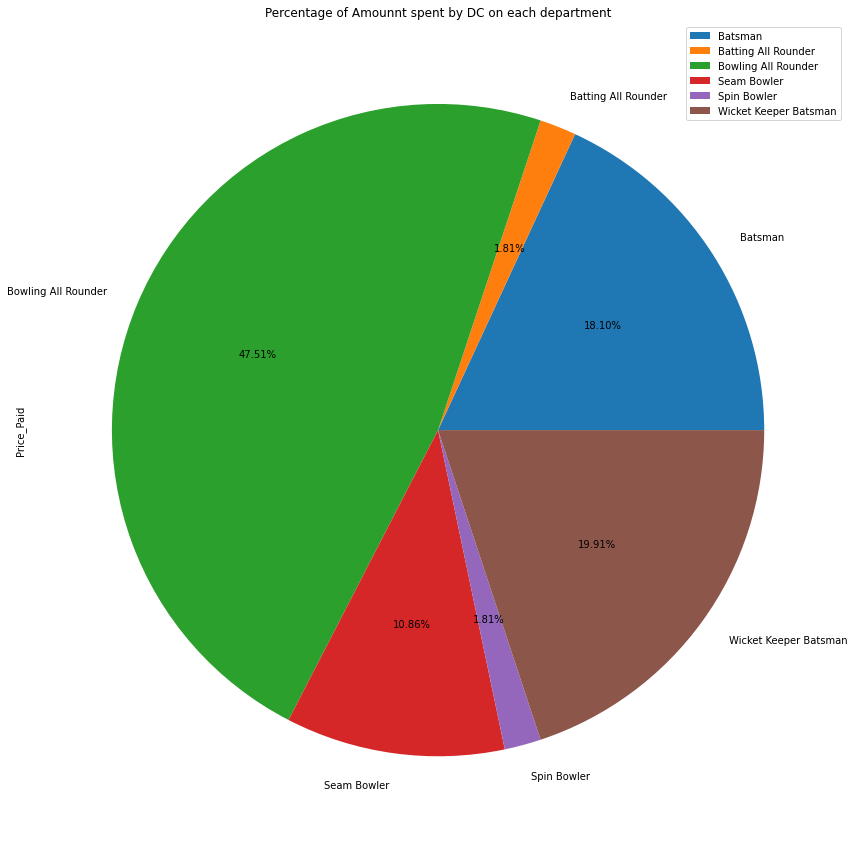

In [145]:
#Amount Distribution - Pie Chart Visualization

dc.groupby(['Role']).sum().plot(kind='pie', y='Price_Paid', autopct="%.2f%%", figsize=(20,15), title="Percentage of Amounnt spent by DC on each department").legend(loc='upper right')

In [146]:
#List of IPL Experienced Players

bool_s=pd.notnull(dc['Previous_IPL_Teams'])
dc[bool_s]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
41,Sam Billings,200,200,Sold,DC,"DC, CSK",England,Wicket Keeper Batsman,Right,NaN,Middle,Capped
48,Steven Smith,200,200,Sold,DC,"RCB, KTK, PWI, RR, RPS",Australia,Batsman,Right,NaN,Middle,Capped
50,Tom Curran,150,525,Sold,DC,"KKR, RR",England,Bowling All Rounder,Right,Right Fast Medium,Lower,Capped
51,Umesh Yadav,100,100,Sold,DC,"RCB, KKR, DC",India,Seam Bowler,NaN,Right Fast,NaN,Capped
55,Vishnu Vinod,20,20,Sold,DC,RCB,India,Wicket Keeper Batsman,Right,NaN,Middle,Uncapped


In [147]:
#List of IPL Newbies in DC

bool_s=pd.isnull(dc['Previous_IPL_Teams'])
dc[bool_s]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
26,Lukman Meriwala,20,20,Sold,DC,NaN,India,Seam Bowler,NaN,Left Fast Medium,NaN,Uncapped
27,Manimaran Siddharth,20,20,Sold,DC,NaN,India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Uncapped
39,Ripal Patel,20,20,Sold,DC,NaN,India,Batting All Rounder,Right,Right Medium Fast,Middle,Uncapped


In [148]:
#List of Internationally Experienced Players in DC

dc[dc['Capped_or_Uncapped']=='Capped']

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
41,Sam Billings,200,200,Sold,DC,"DC, CSK",England,Wicket Keeper Batsman,Right,NaN,Middle,Capped
48,Steven Smith,200,200,Sold,DC,"RCB, KTK, PWI, RR, RPS",Australia,Batsman,Right,NaN,Middle,Capped
50,Tom Curran,150,525,Sold,DC,"KKR, RR",England,Bowling All Rounder,Right,Right Fast Medium,Lower,Capped
51,Umesh Yadav,100,100,Sold,DC,"RCB, KKR, DC",India,Seam Bowler,NaN,Right Fast,NaN,Capped


In [149]:
#List of Internationally Inexperienced Players in DC

dc[dc['Capped_or_Uncapped']=='Uncapped']

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
26,Lukman Meriwala,20,20,Sold,DC,NaN,India,Seam Bowler,NaN,Left Fast Medium,NaN,Uncapped
27,Manimaran Siddharth,20,20,Sold,DC,NaN,India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Uncapped
39,Ripal Patel,20,20,Sold,DC,NaN,India,Batting All Rounder,Right,Right Medium Fast,Middle,Uncapped
55,Vishnu Vinod,20,20,Sold,DC,RCB,India,Wicket Keeper Batsman,Right,NaN,Middle,Uncapped


In [240]:
#No. of players bought at base price

len(dc[dc['Price_Paid']==dc['Base_Price']])

7

In [241]:
#No. of players bought more than base price

len(dc[dc['Price_Paid']!=dc['Base_Price']])

1

In [150]:
srh=data.groupby('Bought_by').get_group('SRH')
srh

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
15,Jagadeesha Suchith,20,30,Sold,SRH,"MI, DC, PBKS",India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Uncapped
20,Kedar Jadhav,200,200,Sold,SRH,"DC, CSK, RCB, KTK",India,Batting All Rounder,Right,Right Offbreak,Middle,Capped
32,Mujeeb Ur Rahman,150,150,Sold,SRH,PBKS,Afghanistan,Spin Bowler,NaN,Right Offbreak,NaN,Capped


In [151]:
#Total Amount Spent

(srh['Price_Paid'].sum())/100

3.8

In [152]:
#List of SRH Batsmen

srh_bats=srh[srh['Role'].str.contains('Batsman')]
srh_bats

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped


In [153]:
#List of SRH Bowlers

srh_bowl=srh[srh['Role'].str.contains('Bowler')]
srh_bowl

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
15,Jagadeesha Suchith,20,30,Sold,SRH,"MI, DC, PBKS",India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Uncapped
32,Mujeeb Ur Rahman,150,150,Sold,SRH,PBKS,Afghanistan,Spin Bowler,NaN,Right Offbreak,NaN,Capped


In [154]:
#List of SRH Allrounders

srh_all=srh[srh['Role'].str.contains('All Rounder')]
srh_all

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
20,Kedar Jadhav,200,200,Sold,SRH,"DC, CSK, RCB, KTK",India,Batting All Rounder,Right,Right Offbreak,Middle,Capped


In [155]:
#Highest Bid Details

srh[srh['Price_Paid']==srh['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
20,Kedar Jadhav,200,200,Sold,SRH,"DC, CSK, RCB, KTK",India,Batting All Rounder,Right,Right Offbreak,Middle,Capped


In [156]:
#Highest Indian Bid Details

srh[srh['Price_Paid']==srh[srh['Country']=='India']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
20,Kedar Jadhav,200,200,Sold,SRH,"DC, CSK, RCB, KTK",India,Batting All Rounder,Right,Right Offbreak,Middle,Capped


In [157]:
#Highest Foreign Bid Details

srh[srh['Price_Paid']==srh[srh['Country']!='India']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
32,Mujeeb Ur Rahman,150,150,Sold,SRH,PBKS,Afghanistan,Spin Bowler,NaN,Right Offbreak,NaN,Capped


In [158]:
#Amount spent on each department

srh_price=srh.groupby('Role')['Price_Paid'].sum()/100
srh_price

Role
Batting All Rounder    2.0
Spin Bowler            1.8
Name: Price_Paid, dtype: float64

In [159]:
#SRH Batsman with Highest Bid

srh_bats[srh_bats['Price_Paid']==srh_bats['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped


In [160]:
#SRH Bowlers with Highest Bid

srh_bowl[srh_bowl['Price_Paid']==srh_bowl['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
32,Mujeeb Ur Rahman,150,150,Sold,SRH,PBKS,Afghanistan,Spin Bowler,NaN,Right Offbreak,NaN,Capped


In [161]:
#SRH All Rounders with Highest Bid

srh_all[srh_all['Price_Paid']==srh_all['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
20,Kedar Jadhav,200,200,Sold,SRH,"DC, CSK, RCB, KTK",India,Batting All Rounder,Right,Right Offbreak,Middle,Capped


In [162]:
#Average amount spent on each department

srh.groupby('Role')['Price_Paid'].mean()/100

Role
Batting All Rounder    2.0
Spin Bowler            0.9
Name: Price_Paid, dtype: float64

In [163]:
#Highest Capped Bid

srh[srh['Price_Paid']==srh[srh['Capped_or_Uncapped']=='Capped']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
20,Kedar Jadhav,200,200,Sold,SRH,"DC, CSK, RCB, KTK",India,Batting All Rounder,Right,Right Offbreak,Middle,Capped


In [164]:
#Highest Uncapped Bid

srh[srh['Price_Paid']==srh[srh['Capped_or_Uncapped']=='Uncapped']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
15,Jagadeesha Suchith,20,30,Sold,SRH,"MI, DC, PBKS",India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Uncapped


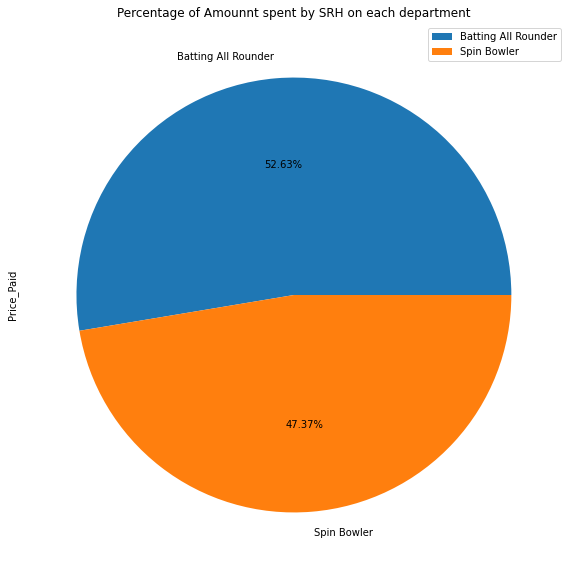

In [165]:
#Amount Distribution - Pie Chart Visualization

srh.groupby(['Role']).sum().plot(kind='pie', y='Price_Paid', autopct="%.2f%%", figsize=(20,10), title="Percentage of Amounnt spent by SRH on each department").legend(loc='upper right')

In [166]:
#List of IPL Experienced Players

bool_s=pd.notnull(srh['Previous_IPL_Teams'])
srh[bool_s]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
15,Jagadeesha Suchith,20,30,Sold,SRH,"MI, DC, PBKS",India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Uncapped
20,Kedar Jadhav,200,200,Sold,SRH,"DC, CSK, RCB, KTK",India,Batting All Rounder,Right,Right Offbreak,Middle,Capped
32,Mujeeb Ur Rahman,150,150,Sold,SRH,PBKS,Afghanistan,Spin Bowler,NaN,Right Offbreak,NaN,Capped


In [167]:
#List of IPL Newbies in SRH

bool_s=pd.isnull(srh['Previous_IPL_Teams'])
srh[bool_s]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped


In [168]:
#List of Internationally Experienced Players in SRH

srh[srh['Capped_or_Uncapped']=='Capped']

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
20,Kedar Jadhav,200,200,Sold,SRH,"DC, CSK, RCB, KTK",India,Batting All Rounder,Right,Right Offbreak,Middle,Capped
32,Mujeeb Ur Rahman,150,150,Sold,SRH,PBKS,Afghanistan,Spin Bowler,NaN,Right Offbreak,NaN,Capped


In [169]:
#List of Internationally Inexperienced Players in SRH

srh[srh['Capped_or_Uncapped']=='Uncapped']

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
15,Jagadeesha Suchith,20,30,Sold,SRH,"MI, DC, PBKS",India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Uncapped


In [238]:
#No. of players bought at base price

len(srh[srh['Price_Paid']==srh['Base_Price']])

2

In [239]:
#No. of players bought more than base price

len(srh[srh['Price_Paid']!=srh['Base_Price']])

1

In [170]:
rr=data.groupby('Bought_by').get_group('RR')
rr

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
1,Akash Singh,20,20,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
6,Chetan Sakariya,20,120,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
8,Chris Morris,75,1625,Sold,RR,"CSK, RR, DC, RCB",South Africa,Bowling All Rounder,Right,Right Fast Medium,Middle,Capped
21,Kishan Cariappa,20,20,Sold,RR,"KKR, PBKS",India,Spin Bowler,NaN,Right Legbreak,NaN,Uncapped
23,Kuldip Yadav,20,20,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
25,Liam Livingstone,75,75,Sold,RR,RR,England,Batting All Rounder,Right,"Right Legbreak, Right Offbreak",Top,Capped
33,Mustaifur Rahman,100,100,Sold,RR,"MI, SRH",Bangladesh,Seam Bowler,NaN,Left Fast Medium,NaN,Capped
46,Shivam Dube,50,440,Sold,RR,RCB,India,All Rounder,Left,Right Medium,Middle,Capped


In [171]:
#Total Amount Spent

(rr['Price_Paid'].sum())/100

24.2

In [172]:
#List of RR Batsmen

rr_bats=rr[rr['Role'].str.contains('Batsman')]
rr_bats

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped


In [173]:
#List of RR Bowlers

rr_bowl=rr[rr['Role'].str.contains('Bowler')]
rr_bowl

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
1,Akash Singh,20,20,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
6,Chetan Sakariya,20,120,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
21,Kishan Cariappa,20,20,Sold,RR,"KKR, PBKS",India,Spin Bowler,NaN,Right Legbreak,NaN,Uncapped
23,Kuldip Yadav,20,20,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
33,Mustaifur Rahman,100,100,Sold,RR,"MI, SRH",Bangladesh,Seam Bowler,NaN,Left Fast Medium,NaN,Capped


In [174]:
#List of RR Allrounders

rr_all=rr[rr['Role'].str.contains('All Rounder')]
rr_all

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
8,Chris Morris,75,1625,Sold,RR,"CSK, RR, DC, RCB",South Africa,Bowling All Rounder,Right,Right Fast Medium,Middle,Capped
25,Liam Livingstone,75,75,Sold,RR,RR,England,Batting All Rounder,Right,"Right Legbreak, Right Offbreak",Top,Capped
46,Shivam Dube,50,440,Sold,RR,RCB,India,All Rounder,Left,Right Medium,Middle,Capped


In [175]:
#Highest Bid Details

rr[rr['Price_Paid']==rr['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
8,Chris Morris,75,1625,Sold,RR,"CSK, RR, DC, RCB",South Africa,Bowling All Rounder,Right,Right Fast Medium,Middle,Capped


In [176]:
#Highest Indian Bid Details

rr[rr['Price_Paid']==rr[rr['Country']=='India']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
46,Shivam Dube,50,440,Sold,RR,RCB,India,All Rounder,Left,Right Medium,Middle,Capped


In [177]:
#Highest Foreign Bid Details

rr[rr['Price_Paid']==rr[rr['Country']!='India']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
8,Chris Morris,75,1625,Sold,RR,"CSK, RR, DC, RCB",South Africa,Bowling All Rounder,Right,Right Fast Medium,Middle,Capped


In [178]:
#Amount spent on each department

rr_price=rr.groupby('Role')['Price_Paid'].sum()/100
rr_price

Role
All Rounder             4.40
Batting All Rounder     0.75
Bowling All Rounder    16.25
Seam Bowler             2.60
Spin Bowler             0.20
Name: Price_Paid, dtype: float64

In [179]:
#RR Batsman with Highest Bid

rr_bats[rr_bats['Price_Paid']==rr_bats['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped


In [180]:
#RR Bowlers with Highest Bid

rr_bowl[rr_bowl['Price_Paid']==rr_bowl['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
6,Chetan Sakariya,20,120,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped


In [181]:
#RR All Rounders with Highest Bid

rr_all[rr_all['Price_Paid']==rr_all['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
8,Chris Morris,75,1625,Sold,RR,"CSK, RR, DC, RCB",South Africa,Bowling All Rounder,Right,Right Fast Medium,Middle,Capped


In [182]:
#Average amount spent on each department

rr.groupby('Role')['Price_Paid'].mean()/100

Role
All Rounder             4.40
Batting All Rounder     0.75
Bowling All Rounder    16.25
Seam Bowler             0.65
Spin Bowler             0.20
Name: Price_Paid, dtype: float64

In [183]:
#Highest Capped Bid

rr[rr['Price_Paid']==rr[rr['Capped_or_Uncapped']=='Capped']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
8,Chris Morris,75,1625,Sold,RR,"CSK, RR, DC, RCB",South Africa,Bowling All Rounder,Right,Right Fast Medium,Middle,Capped


In [184]:
#Highest Uncapped Bid

rr[rr['Price_Paid']==rr[rr['Capped_or_Uncapped']=='Uncapped']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
6,Chetan Sakariya,20,120,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped


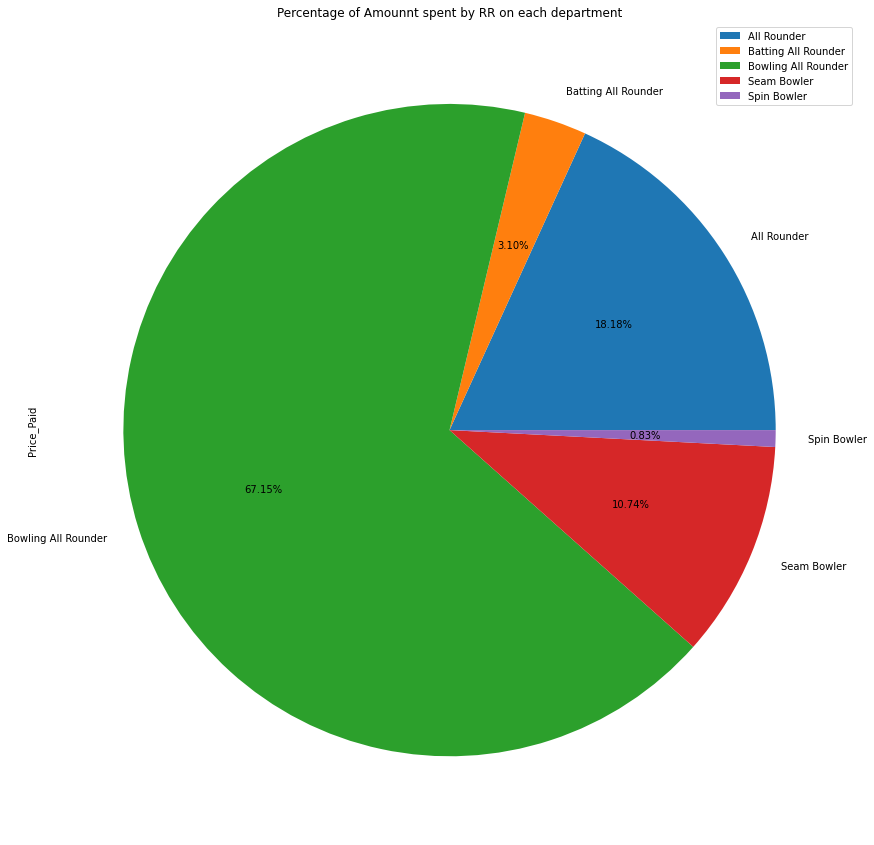

In [185]:
#Amount Distribution - Pie Chart Visualization

rr.groupby(['Role']).sum().plot(kind='pie', y='Price_Paid', autopct="%.2f%%", figsize=(20,15), title="Percentage of Amounnt spent by RR on each department").legend(loc='upper right')

In [186]:
#List of IPL Experienced Players

bool_s=pd.notnull(rr['Previous_IPL_Teams'])
rr[bool_s]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
8,Chris Morris,75,1625,Sold,RR,"CSK, RR, DC, RCB",South Africa,Bowling All Rounder,Right,Right Fast Medium,Middle,Capped
21,Kishan Cariappa,20,20,Sold,RR,"KKR, PBKS",India,Spin Bowler,NaN,Right Legbreak,NaN,Uncapped
25,Liam Livingstone,75,75,Sold,RR,RR,England,Batting All Rounder,Right,"Right Legbreak, Right Offbreak",Top,Capped
33,Mustaifur Rahman,100,100,Sold,RR,"MI, SRH",Bangladesh,Seam Bowler,NaN,Left Fast Medium,NaN,Capped
46,Shivam Dube,50,440,Sold,RR,RCB,India,All Rounder,Left,Right Medium,Middle,Capped


In [187]:
#List of IPL Newbies in RR

bool_s=pd.isnull(rr['Previous_IPL_Teams'])
rr[bool_s]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
1,Akash Singh,20,20,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
6,Chetan Sakariya,20,120,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
23,Kuldip Yadav,20,20,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped


In [188]:
#List of Internationally Experienced Players in RR

rr[rr['Capped_or_Uncapped']=='Capped']

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
8,Chris Morris,75,1625,Sold,RR,"CSK, RR, DC, RCB",South Africa,Bowling All Rounder,Right,Right Fast Medium,Middle,Capped
25,Liam Livingstone,75,75,Sold,RR,RR,England,Batting All Rounder,Right,"Right Legbreak, Right Offbreak",Top,Capped
33,Mustaifur Rahman,100,100,Sold,RR,"MI, SRH",Bangladesh,Seam Bowler,NaN,Left Fast Medium,NaN,Capped
46,Shivam Dube,50,440,Sold,RR,RCB,India,All Rounder,Left,Right Medium,Middle,Capped


In [189]:
#List of Internationally Inexperienced Players in RR

rr[rr['Capped_or_Uncapped']=='Uncapped']

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
1,Akash Singh,20,20,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
6,Chetan Sakariya,20,120,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
21,Kishan Cariappa,20,20,Sold,RR,"KKR, PBKS",India,Spin Bowler,NaN,Right Legbreak,NaN,Uncapped
23,Kuldip Yadav,20,20,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped


In [236]:
#No. of players bought at base price

len(rr[rr['Price_Paid']==rr['Base_Price']])

5

In [237]:
#No. of players bought more than base price

len(rr[rr['Price_Paid']!=rr['Base_Price']])

3

In [190]:
pbks=data.groupby('Bought_by').get_group('PBKS')
pbks

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
10,Dawid Malan,150,150,Sold,PBKS,NaN,England,Batsman,Left,NaN,Top,Capped
11,Fabian Allen,75,75,Sold,PBKS,SRH,West Indies,Bowling All Rounder,Right,Slow Left Orthodox,Middle,Capped
16,Jalaj Saxena,30,30,Sold,PBKS,"MI, DC, RCB",India,Batting All Rounder,Right,Right Offbreak,Top,Uncapped
18,Jhye Richardson,150,1400,Sold,PBKS,NaN,Australia,Seam Bowler,NaN,Right Fast,NaN,Capped
31,Moises Henriques,100,420,Sold,PBKS,"KKR, DC, RCB, SRH, MI",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
38,Riley Meredith,40,800,Sold,PBKS,NaN,Australia,Seam Bowler,NaN,Right Fast,NaN,Uncapped
42,Saurabh Kumar,20,20,Sold,PBKS,RPS,India,Bowling All Rounder,Left,Slow Left Orthodox,Lower,Uncapped
43,Shahrukh Khan,20,525,Sold,PBKS,NaN,India,Batsman,Right,NaN,Middle,Uncapped
52,Utkarsh Singh,20,20,Sold,PBKS,NaN,India,All Rounder,Left,Right Offbreak,Top,Uncapped


In [191]:
#Total Amount Spent

(pbks['Price_Paid'].sum())/100

34.4

In [192]:
#List of PBKS Batsmen

pbks_bats=pbks[pbks['Role'].str.contains('Batsman')]
pbks_bats

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
10,Dawid Malan,150,150,Sold,PBKS,NaN,England,Batsman,Left,NaN,Top,Capped
43,Shahrukh Khan,20,525,Sold,PBKS,NaN,India,Batsman,Right,NaN,Middle,Uncapped


In [193]:
#List of PBKS Bowlers

pbks_bowl=pbks[pbks['Role'].str.contains('Bowler')]
pbks_bowl

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
18,Jhye Richardson,150,1400,Sold,PBKS,NaN,Australia,Seam Bowler,NaN,Right Fast,NaN,Capped
38,Riley Meredith,40,800,Sold,PBKS,NaN,Australia,Seam Bowler,NaN,Right Fast,NaN,Uncapped


In [194]:
#List of PBKS Allrounders

pbks_all=pbks[pbks['Role'].str.contains('All Rounder')]
pbks_all

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
11,Fabian Allen,75,75,Sold,PBKS,SRH,West Indies,Bowling All Rounder,Right,Slow Left Orthodox,Middle,Capped
16,Jalaj Saxena,30,30,Sold,PBKS,"MI, DC, RCB",India,Batting All Rounder,Right,Right Offbreak,Top,Uncapped
31,Moises Henriques,100,420,Sold,PBKS,"KKR, DC, RCB, SRH, MI",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
42,Saurabh Kumar,20,20,Sold,PBKS,RPS,India,Bowling All Rounder,Left,Slow Left Orthodox,Lower,Uncapped
52,Utkarsh Singh,20,20,Sold,PBKS,NaN,India,All Rounder,Left,Right Offbreak,Top,Uncapped


In [195]:
#Highest Bid Details

pbks[pbks['Price_Paid']==pbks['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
18,Jhye Richardson,150,1400,Sold,PBKS,NaN,Australia,Seam Bowler,NaN,Right Fast,NaN,Capped


In [196]:
#Highest Indian Bid Details

pbks[pbks['Price_Paid']==pbks[pbks['Country']=='India']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
43,Shahrukh Khan,20,525,Sold,PBKS,NaN,India,Batsman,Right,NaN,Middle,Uncapped


In [197]:
#Highest Foreign Bid Details

pbks[pbks['Price_Paid']==pbks[pbks['Country']!='India']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
18,Jhye Richardson,150,1400,Sold,PBKS,NaN,Australia,Seam Bowler,NaN,Right Fast,NaN,Capped


In [198]:
#Amount spent on each department

pbks_price=pbks.groupby('Role')['Price_Paid'].sum()/100
pbks_price

Role
All Rounder             4.40
Batsman                 6.75
Batting All Rounder     0.30
Bowling All Rounder     0.95
Seam Bowler            22.00
Name: Price_Paid, dtype: float64

In [199]:
#PBKS Batsman with Highest Bid

pbks_bats[pbks_bats['Price_Paid']==pbks_bats['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
43,Shahrukh Khan,20,525,Sold,PBKS,NaN,India,Batsman,Right,NaN,Middle,Uncapped


In [200]:
#PBKS Bowlers with Highest Bid

pbks_bowl[pbks_bowl['Price_Paid']==pbks_bowl['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
18,Jhye Richardson,150,1400,Sold,PBKS,NaN,Australia,Seam Bowler,NaN,Right Fast,NaN,Capped


In [201]:
#PBKS All Rounders with Highest Bid

pbks_all[pbks_all['Price_Paid']==pbks_all['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
31,Moises Henriques,100,420,Sold,PBKS,"KKR, DC, RCB, SRH, MI",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped


In [202]:
#Average amount spent on each department

pbks.groupby('Role')['Price_Paid'].mean()/100

Role
All Rounder             2.200
Batsman                 3.375
Batting All Rounder     0.300
Bowling All Rounder     0.475
Seam Bowler            11.000
Name: Price_Paid, dtype: float64

In [203]:
#Highest Capped Bid

pbks[pbks['Price_Paid']==pbks[pbks['Capped_or_Uncapped']=='Capped']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
18,Jhye Richardson,150,1400,Sold,PBKS,NaN,Australia,Seam Bowler,NaN,Right Fast,NaN,Capped


In [204]:
#Highest Uncapped Bid

pbks[pbks['Price_Paid']==pbks[pbks['Capped_or_Uncapped']=='Uncapped']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
38,Riley Meredith,40,800,Sold,PBKS,NaN,Australia,Seam Bowler,NaN,Right Fast,NaN,Uncapped


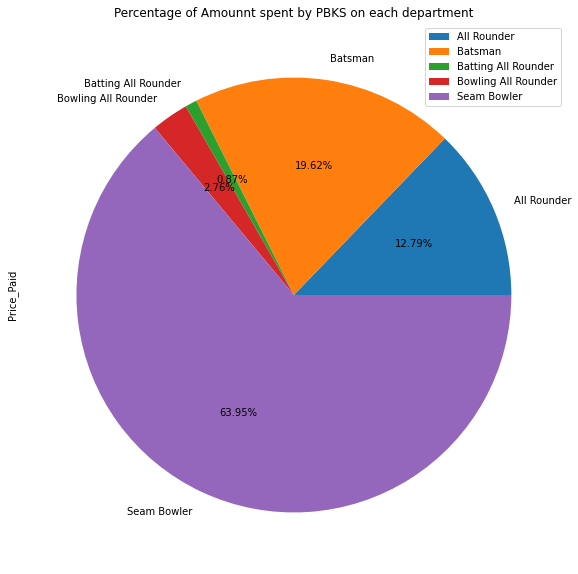

In [205]:
#Amount Distribution - Pie Chart Visualization

pbks.groupby(['Role']).sum().plot(kind='pie', y='Price_Paid', autopct="%.2f%%", figsize=(20,10), title="Percentage of Amounnt spent by PBKS on each department").legend(loc='upper right')

In [206]:
#List of IPL Experienced Players

bool_s=pd.notnull(pbks['Previous_IPL_Teams'])
pbks[bool_s]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
11,Fabian Allen,75,75,Sold,PBKS,SRH,West Indies,Bowling All Rounder,Right,Slow Left Orthodox,Middle,Capped
16,Jalaj Saxena,30,30,Sold,PBKS,"MI, DC, RCB",India,Batting All Rounder,Right,Right Offbreak,Top,Uncapped
31,Moises Henriques,100,420,Sold,PBKS,"KKR, DC, RCB, SRH, MI",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
42,Saurabh Kumar,20,20,Sold,PBKS,RPS,India,Bowling All Rounder,Left,Slow Left Orthodox,Lower,Uncapped


In [207]:
#List of IPL Newbies in PBKS

bool_s=pd.isnull(pbks['Previous_IPL_Teams'])
pbks[bool_s]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
10,Dawid Malan,150,150,Sold,PBKS,NaN,England,Batsman,Left,NaN,Top,Capped
18,Jhye Richardson,150,1400,Sold,PBKS,NaN,Australia,Seam Bowler,NaN,Right Fast,NaN,Capped
38,Riley Meredith,40,800,Sold,PBKS,NaN,Australia,Seam Bowler,NaN,Right Fast,NaN,Uncapped
43,Shahrukh Khan,20,525,Sold,PBKS,NaN,India,Batsman,Right,NaN,Middle,Uncapped
52,Utkarsh Singh,20,20,Sold,PBKS,NaN,India,All Rounder,Left,Right Offbreak,Top,Uncapped


In [208]:
#List of Internationally Experienced Players in PBKS

pbks[pbks['Capped_or_Uncapped']=='Capped']

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
10,Dawid Malan,150,150,Sold,PBKS,NaN,England,Batsman,Left,NaN,Top,Capped
11,Fabian Allen,75,75,Sold,PBKS,SRH,West Indies,Bowling All Rounder,Right,Slow Left Orthodox,Middle,Capped
18,Jhye Richardson,150,1400,Sold,PBKS,NaN,Australia,Seam Bowler,NaN,Right Fast,NaN,Capped
31,Moises Henriques,100,420,Sold,PBKS,"KKR, DC, RCB, SRH, MI",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped


In [209]:
#List of Internationally Inexperienced Players in PBKS

pbks[pbks['Capped_or_Uncapped']=='Uncapped']

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
16,Jalaj Saxena,30,30,Sold,PBKS,"MI, DC, RCB",India,Batting All Rounder,Right,Right Offbreak,Top,Uncapped
38,Riley Meredith,40,800,Sold,PBKS,NaN,Australia,Seam Bowler,NaN,Right Fast,NaN,Uncapped
42,Saurabh Kumar,20,20,Sold,PBKS,RPS,India,Bowling All Rounder,Left,Slow Left Orthodox,Lower,Uncapped
43,Shahrukh Khan,20,525,Sold,PBKS,NaN,India,Batsman,Right,NaN,Middle,Uncapped
52,Utkarsh Singh,20,20,Sold,PBKS,NaN,India,All Rounder,Left,Right Offbreak,Top,Uncapped


In [234]:
#No. of players bought at base price

len(pbks[pbks['Price_Paid']==pbks['Base_Price']])

5

In [235]:
#No. of players bought more than base price

len(pbks[pbks['Price_Paid']!=pbks['Base_Price']])

4

In [211]:
kkr=data.groupby('Bought_by').get_group('KKR')
kkr

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
3,Ben Cutting,75,75,Sold,KKR,"RR, SRH, MI",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
13,Harbhajan Singh,200,200,Sold,KKR,"CSK, MI",India,Spin Bowler,NaN,Right Offbreak,NaN,Capped
19,Karun Nair,50,50,Sold,KKR,"RCB, DC, PBKS, RR",India,Batsman,Right,NaN,Middle,Capped
35,Pawan Negi,50,50,Sold,KKR,"DC, CSK, RCB",India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Capped
44,Shakib Al Hasan,200,320,Sold,KKR,"KKR, SRH",Bangladesh,All Rounder,Left,Left Orthodox,Middle,Capped
45,Sheldon Jackson,20,20,Sold,KKR,"RCB, KKR",India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
53,Vaibhav Arora,20,20,Sold,KKR,NaN,India,Seam Bowler,NaN,Right Fast Medium,NaN,Uncapped
54,Venkatesh Iyer,20,20,Sold,KKR,NaN,India,Batting All Rounder,Left,Right Medium,Top,Uncapped


In [212]:
#Total Amount Spent

(kkr['Price_Paid'].sum())/100

7.55

In [213]:
#List of KKR Batsmen

kkr_bats=kkr[kkr['Role'].str.contains('Batsman')]
kkr_bats

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
19,Karun Nair,50,50,Sold,KKR,"RCB, DC, PBKS, RR",India,Batsman,Right,NaN,Middle,Capped
45,Sheldon Jackson,20,20,Sold,KKR,"RCB, KKR",India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped


In [214]:
#List of KKR Bowlers

kkr_bowl=kkr[kkr['Role'].str.contains('Bowler')]
kkr_bowl

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
13,Harbhajan Singh,200,200,Sold,KKR,"CSK, MI",India,Spin Bowler,NaN,Right Offbreak,NaN,Capped
35,Pawan Negi,50,50,Sold,KKR,"DC, CSK, RCB",India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Capped
53,Vaibhav Arora,20,20,Sold,KKR,NaN,India,Seam Bowler,NaN,Right Fast Medium,NaN,Uncapped


In [215]:
#List of KKR All Rounders

kkr_all=kkr[kkr['Role'].str.contains('All Rounder')]
kkr_all

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
3,Ben Cutting,75,75,Sold,KKR,"RR, SRH, MI",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
44,Shakib Al Hasan,200,320,Sold,KKR,"KKR, SRH",Bangladesh,All Rounder,Left,Left Orthodox,Middle,Capped
54,Venkatesh Iyer,20,20,Sold,KKR,NaN,India,Batting All Rounder,Left,Right Medium,Top,Uncapped


In [216]:
#Highest Bid Details

kkr[kkr['Price_Paid']==kkr['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
44,Shakib Al Hasan,200,320,Sold,KKR,"KKR, SRH",Bangladesh,All Rounder,Left,Left Orthodox,Middle,Capped


In [217]:
#Highest Indian Bid Details

kkr[kkr['Price_Paid']==kkr[kkr['Country']=='India']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
13,Harbhajan Singh,200,200,Sold,KKR,"CSK, MI",India,Spin Bowler,NaN,Right Offbreak,NaN,Capped


In [218]:
#Highest Foreign Bid Details

kkr[kkr['Price_Paid']==kkr[kkr['Country']!='India']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
44,Shakib Al Hasan,200,320,Sold,KKR,"KKR, SRH",Bangladesh,All Rounder,Left,Left Orthodox,Middle,Capped


In [219]:
#Amount spent on each department

kkr_price=kkr.groupby('Role')['Price_Paid'].sum()/100
kkr_price

Role
All Rounder              3.95
Batsman                  0.50
Batting All Rounder      0.20
Seam Bowler              0.20
Spin Bowler              2.50
Wicket Keeper Batsman    0.20
Name: Price_Paid, dtype: float64

In [220]:
#KKR Batsman with Highest Bid

kkr_bats[kkr_bats['Price_Paid']==kkr_bats['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
19,Karun Nair,50,50,Sold,KKR,"RCB, DC, PBKS, RR",India,Batsman,Right,NaN,Middle,Capped


In [221]:
#KKR Bowlers with Highest Bid

kkr_bowl[kkr_bowl['Price_Paid']==kkr_bowl['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
13,Harbhajan Singh,200,200,Sold,KKR,"CSK, MI",India,Spin Bowler,NaN,Right Offbreak,NaN,Capped


In [222]:
#KKR All Rounders with Highest Bid

kkr_all[kkr_all['Price_Paid']==kkr_all['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
44,Shakib Al Hasan,200,320,Sold,KKR,"KKR, SRH",Bangladesh,All Rounder,Left,Left Orthodox,Middle,Capped


In [223]:
#Average amount spent on each department

kkr.groupby('Role')['Price_Paid'].mean()/100

Role
All Rounder              1.975
Batsman                  0.500
Batting All Rounder      0.200
Seam Bowler              0.200
Spin Bowler              1.250
Wicket Keeper Batsman    0.200
Name: Price_Paid, dtype: float64

In [224]:
#Highest Capped Bid

kkr[kkr['Price_Paid']==kkr[kkr['Capped_or_Uncapped']=='Capped']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
44,Shakib Al Hasan,200,320,Sold,KKR,"KKR, SRH",Bangladesh,All Rounder,Left,Left Orthodox,Middle,Capped


In [225]:
#Highest Uncapped Bid

kkr[kkr['Price_Paid']==kkr[kkr['Capped_or_Uncapped']=='Uncapped']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
45,Sheldon Jackson,20,20,Sold,KKR,"RCB, KKR",India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
53,Vaibhav Arora,20,20,Sold,KKR,NaN,India,Seam Bowler,NaN,Right Fast Medium,NaN,Uncapped
54,Venkatesh Iyer,20,20,Sold,KKR,NaN,India,Batting All Rounder,Left,Right Medium,Top,Uncapped


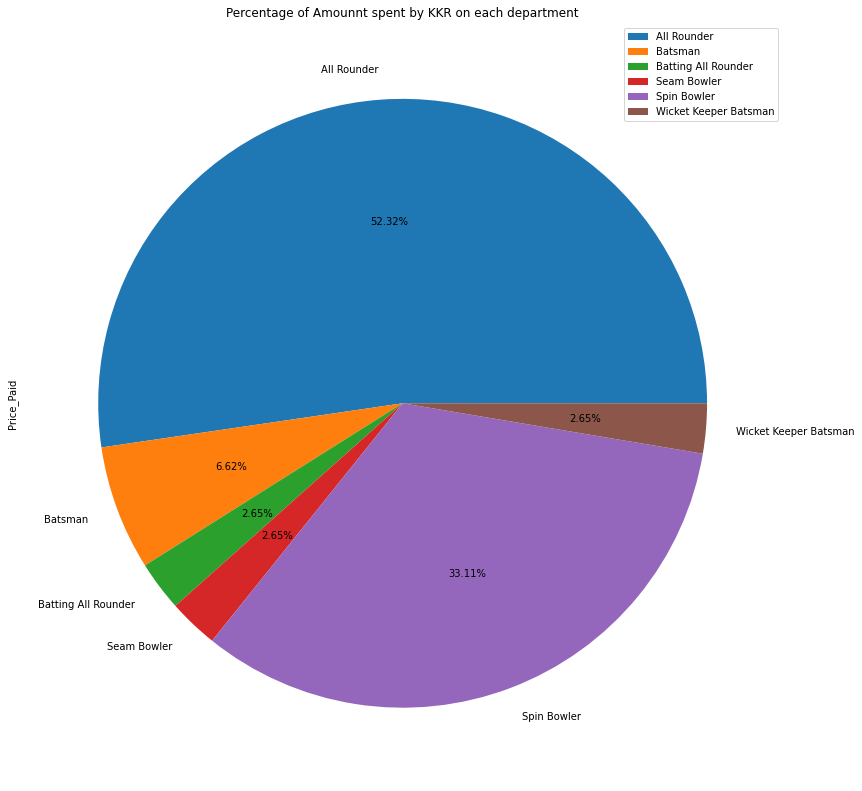

In [226]:
#Amount Distribution - Pie Chart Visualization

kkr.groupby(['Role']).sum().plot(kind='pie', y='Price_Paid', autopct="%.2f%%", figsize=(15,14), title="Percentage of Amounnt spent by KKR on each department").legend(loc='upper right')

In [227]:
#List of IPL Experienced Players in KKR

bool_s=pd.notnull(kkr['Previous_IPL_Teams'])
kkr[bool_s]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
3,Ben Cutting,75,75,Sold,KKR,"RR, SRH, MI",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
13,Harbhajan Singh,200,200,Sold,KKR,"CSK, MI",India,Spin Bowler,NaN,Right Offbreak,NaN,Capped
19,Karun Nair,50,50,Sold,KKR,"RCB, DC, PBKS, RR",India,Batsman,Right,NaN,Middle,Capped
35,Pawan Negi,50,50,Sold,KKR,"DC, CSK, RCB",India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Capped
44,Shakib Al Hasan,200,320,Sold,KKR,"KKR, SRH",Bangladesh,All Rounder,Left,Left Orthodox,Middle,Capped
45,Sheldon Jackson,20,20,Sold,KKR,"RCB, KKR",India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped


In [228]:
#List of IPL Newbies in KKR

bool_s=pd.isnull(kkr['Previous_IPL_Teams'])
kkr[bool_s]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
53,Vaibhav Arora,20,20,Sold,KKR,NaN,India,Seam Bowler,NaN,Right Fast Medium,NaN,Uncapped
54,Venkatesh Iyer,20,20,Sold,KKR,NaN,India,Batting All Rounder,Left,Right Medium,Top,Uncapped


In [229]:
#List of Internationally Experienced Players in KKR

kkr[kkr['Capped_or_Uncapped']=='Capped']

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
3,Ben Cutting,75,75,Sold,KKR,"RR, SRH, MI",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
13,Harbhajan Singh,200,200,Sold,KKR,"CSK, MI",India,Spin Bowler,NaN,Right Offbreak,NaN,Capped
19,Karun Nair,50,50,Sold,KKR,"RCB, DC, PBKS, RR",India,Batsman,Right,NaN,Middle,Capped
35,Pawan Negi,50,50,Sold,KKR,"DC, CSK, RCB",India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Capped
44,Shakib Al Hasan,200,320,Sold,KKR,"KKR, SRH",Bangladesh,All Rounder,Left,Left Orthodox,Middle,Capped


In [230]:
#List of Internationally Inexperienced Players in KKR

kkr[kkr['Capped_or_Uncapped']=='Uncapped']

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
45,Sheldon Jackson,20,20,Sold,KKR,"RCB, KKR",India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
53,Vaibhav Arora,20,20,Sold,KKR,NaN,India,Seam Bowler,NaN,Right Fast Medium,NaN,Uncapped
54,Venkatesh Iyer,20,20,Sold,KKR,NaN,India,Batting All Rounder,Left,Right Medium,Top,Uncapped


In [231]:
#No. of players bought at base price

len(kkr[kkr['Price_Paid']==kkr['Base_Price']])

7

In [232]:
#No. of players bought more than base price

len(kkr[kkr['Price_Paid']!=kkr['Base_Price']])

1